# Directional Couplers

**TODO: INSERT PICTURE OF MODES**

Directional couplers move light from one waveguide to another. This is done simply by bringing two waveguides parallel to each other for a certain distance, with a small gap between them. The evanescent fields (fields existing outside of the waveguide) of one waveguide interact with another and thus power is transferred. This principle can be used to split or combine light, depending on the coupling length (the length at which the waveguides are sufficiently close to each other) and the phase of the light in the waveguides.

<div style="text-align: center;">

![dir_cplr](https://github.com/BYUCamachoLab/Photonics-Bootcamp/blob/main/book/images/Notebook_Images/dir_cplr.png?raw=true)

</div>

<p style="text-align: center;"> Layout of a directional coupler in gdsfactory </p>

Directional couplers can be designed to produce any combination of power at the outputs. This could be a simple 50/50 split, a 60/40 split, or even a 100/0 split where all the input power in one waveguide is coupled to the other. The fraction of power that is coupled from one waveguide to another is dependent on geometric parameters and can be described as:

$$ \kappa ^2 = \frac {P_{cross}}{P_0} = sin^2(CL)$$

Where $\kappa$ is the field coupling, $P_{cross}$ is the coupled power, $P_0$ is the input power, $C$ is the coupling coefficient, and $L$ is the length of the coupler.

The coupling coefficient is found with supermode analysis.

 

### Supermodes

Just like there are modes that exist in one waveguide, supermodes are modes that exist in multiple waveguides based on the interactions between them. These modes interact with each other and the combination of these interactions results in what light is propagating in the waveguide.

An "odd", or antisymmetric, supermode occurs when light in the two waveguides are $180^\circ$ out of phase i.e. perfectly out of phase. Similarly, an "even", or symmetric, supermode occurs when the two waveguides are in phase.

### Coupling Coefficient
The two supermodes that are used to find the coupling coefficient are the first two modes, which happen to be an even and odd mode, respectively.

The coupling coefficient is $C = \frac{\pi\Delta n}{\lambda}$

Where $\Delta n = |n_{1} - n_{2}| = |n_{eff,even} - n_{eff,odd}|$

### Beating
As seen in the equation above, each supermode has its own effective index ($n_{eff,even}$, $n_{eff,odd}$) that differs from that of the normal mode in the waveguide and is dependent of the gap between the waveguides. $n_{eff,even}$ increases as the gap decreases, and $n_{eff,odd}$ decreases as the gap decreases. The different effective indices also mean that the two modes have different propagation constants.

The propagation constant is:
$\beta = \frac{2 \pi n_eff}{\lambda}$

Because of this difference in propagation constants, the field intensity oscillates between the two waveguides. This is called beating. As the gap between the waveguides gets smaller, the beating gets faster since $\Delta n$ gets larger as the difference increases, thus making the cross-over length shorter.

The cross-over length is the length it takes for all of the power to go from one waveguide to the other (essentially one beat) and is discussed below.

### Cross-over Length
The power that one waveguide receives from the other is given by:

$$
P_{cross}(L) = P_{initial}sin^2(\frac{\pi\Delta n}{\lambda}L)
$$

and the coupling length, $L$, that gives 100% power transfer is $$L_{cross-over} = \frac {\lambda}{2\Delta n}$$

This is found from determining what length when multiplied by the propagation constants makes the phase difference $\pi$:

$$ \beta _1 L_x - \beta _2 L_x = \pi $$
$$ L_x[\frac{2 \pi n_1}{\lambda} - \frac{2 \pi n_2}{\lambda}] = \pi $$


### Simulation 

To explore how electric field intensity oscillates between two close waveguides, a meep simulation is provided below that creates two long waveguides with a gap of 0.2um, excites a source at the end of one, and shows the electric field intensity over time in the waveguides. Change the gap distance to observe its affect on the cross-over length. You can also change the lengths of the waveguides to better see the beating. The simulation may take a couple of minutes depending on the length of your waveguide. The plot of the simulation setup and the outputted GIF showing the field intensities for a simulation with a gap of $0.2 \mu m$ is shown below.

     block, center = (0,0,0)
          size (32,4.07,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (0,0.285,0)
          size (32,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-0.285,0)
          size (32,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)


<Axes: xlabel='X', ylabel='Y'>

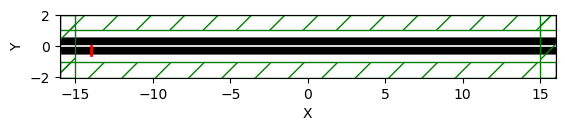

In [7]:
import meep as mp

# Define materials
Si = mp.Medium(index=3.45)
SiO2 = mp.Medium(index=1.45)

# Define wavelength in um
wvl = 1.55


# # Define cell and geometric parameters
resolution = 20
wg_width = 0.5
dpml = 1
pad = 0.5
## CHANGE GAP DISTANCE ##
gap = 0.07
## CHANGE WAVEGUIDE LENGTH ##
Lx = 30

Sx = dpml + Lx + dpml
Sy = dpml + pad + wg_width + gap + wg_width + pad + dpml
wg_center_y = gap/2 + wg_width/2

# Add PML (perfectly matched layers)
pml = [mp.PML(dpml)]

# Create 2 infinitely long parallel waveguides
geometry = [mp.Block(size=mp.Vector3(Sx,Sy, 0), center=mp.Vector3(), material=SiO2),
            mp.Block(size=mp.Vector3(Sx,wg_width, 0), center=mp.Vector3(0, wg_center_y, 0), material=Si),
            mp.Block(size=mp.Vector3(Sx,wg_width, 0), center=mp.Vector3(0, -wg_center_y, 0), material=Si),
            ]

# Put a pulse Eigenmode source at beginning of one waveguide
fcen = 1 / wvl
width = 0.1
fwidth = width * fcen
src=mp.GaussianSource(frequency=fcen, fwidth=fwidth)
source = [mp.EigenModeSource(src=src, eig_band=1,
        eig_kpoint = (1,0,0),
        size=mp.Vector3(0,gap+wg_width),
        center=mp.Vector3(-Sx/2+dpml+1, -wg_center_y))
        ]

# Simulation object
sim = mp.Simulation(
    cell_size=mp.Vector3(Sx, Sy),
    boundary_layers=pml,
    geometry=geometry,
    sources=source,
    default_material=SiO2,
    resolution=resolution,
)

# Show simulation set-up
sim.plot2D()

In [8]:
from PIL import Image
import glob
import os

# Capture electric field intensity over time and output into a gif
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(2, mp.output_efield_z)),
        until=200)

# Generate pngs from the simulation output
# The line that worked in my workspace
os.system("h5topng -t 0:99 -R -Zc /home/ebang4/miniconda3/envs/h5utils/share/h5utils/colormaps/RdBu -A /home/ebang4/Github/Photonics-Bootcamp/book/pages/eps-000000.00.h5 -a /home/ebang4/miniconda3/envs/h5utils/share/h5utils/colormaps/gray /home/ebang4/Github/Photonics-Bootcamp/book/pages/ez.h5")

# This line assumes that their colormaps are working and that they are in the same directory as the output files
# also that h5py is installed
os.system("h5topng -t 0:299 -R -Zc RdBu -A eps-000000.00.h5 -a gray ez.h5")

# Create a gif from the pngs
frames = []
imgs = glob.glob("ez.t*")
imgs.sort()
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

 
# Save into a GIF file that loops forever
frames[0].save('ez.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               loop=0)

# Clean up workspace by deleting all generated images
for i in imgs: 
    os.remove(i)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00039506 s
Working in 2D dimensions.
Computational cell is 32 x 4.05 x 0 with resolution 20
     block, center = (0,0,0)
          size (32,4.07,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.1025,2.1025,2.1025)
     block, center = (0,0.285,0)
          size (32,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
     block, center = (0,-0.285,0)
          size (32,0.5,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.9025,11.9025,11.9025)
time for set_epsilon = 0.149517 s
-----------


MPB solved for frequency_1(1,0,0) = 0.313423 after 16 iters
MPB solved for frequency_1(2.07931,0,0) = 0.636587 after 10 iters
MPB solved for frequency_1(2.1086,0,0) = 0.645157 after 7 iters
MPB solved for frequency_1(2.10862,0,0) = 0.645161 after 2 iters
creating output file "./eps-000000.00.h5"...
creating output file "./ez.h5"...
Meep progress: 76.72500000000001/200.0 = 38.4% done in 4.0s, 6.4s to go
on time step 3077 (time=76.925), 0.00130015 s/step
Meep progress: 155.425/200.0 = 77.7% done in 8.0s, 2.3s to go
on time step 6227 (time=155.675), 0.00126987 s/step
run 0 finished at t = 200.0 (8000 timesteps)


h5topng error: invalid slice of HDF5 data


Image of the simulation set-up:

<div style="text-align: center;">

![set-up](https://github.com/BYUCamachoLab/Photonics-Bootcamp/blob/main/book/images/Notebook_Images/dircplr_sim_setup.png?raw=true)

</div>

Gif from the meep simulation with a gap of $0.2 \mu m$:

<div style="text-align: center;">

![gif](https://github.com/BYUCamachoLab/Photonics-Bootcamp/blob/main/book/images/Notebook_Images/dircplr_ez.gif?raw=true)

</div>

**CREATE graphs to show the relationship that hopefully they have just observed in code**

### Coupler-gap Dependence

There is an exponential relationship between the gap and the coupling.

$$C = B\cdot e^{-A \cdot g}$$

$A$ and $B$ are dependent on various parameters of the directional coupler, such as the geometry and the wavelength at which it is being operated.

### Design Considerations

So, when designing a directional coupler, you must select a length and gap distance that will give you your desired fraction of the input power at each output port. Also, given the important role that geometry has in determining the characteristics of a directional coupler (such as the coupling coefficient), they are very susceptible to manufacturing variations. This is something to keep in mind as you build circuits that may have strict specifications.

Another element to consider is that the principles that make a directional coupler work can also mess with the layout of your chip. Parasitic coupling occurs when two waveguides (that are not part of a directional coupler) are placed too close to each other, leading to power "leaking" from one to the other. Waveguides and components should be placed far enough away so that this does not happen.

### Sources

"Silicon Photonics Design" by Lukas Chrostowski

"Photonic Components: Directional Coupler" by Stefan Preble